In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import os

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Access to workspace directory
Make sure you have added the shortcut from the shared drive to your "My Drive"

In [4]:
# path = "/content/drive/My Drive/"
# dir_list = os.listdir(path)
# print(dir_list) # Make sure you see "data_workspace" in the listing

# Load data into dataframe

## Read CSV

In [5]:
# file_path = '/content/drive/My Drive/data_workspace/data_it_jobs.csv'

file_path = '../data/data_it_jobs.csv'
df = pd.read_csv(file_path)

## Drop unused columns

In [6]:
df = df.drop(['job_title', 'search_country', 'job_level'], axis = 1)

## Split x and y

In [7]:
df_x = df.drop(['search_position'], axis=1)

df_y = df.search_position

In [8]:
df_y.unique()

array(['data_base_administrator', 'maintenance_data_analyst',
       'software_engineer'], dtype=object)

## One hot encoding

In [9]:
df_y = pd.get_dummies(df_y, columns=['search_position'], prefix=None)

## Split training and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y.software_engineer, test_size=0.3, random_state=1) # 70% training and 30% test

# Train

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# prune
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # Train Decision Tree Classifer
    clf.fit(X_train, y_train)

    clfs.append(clf)

## Validate

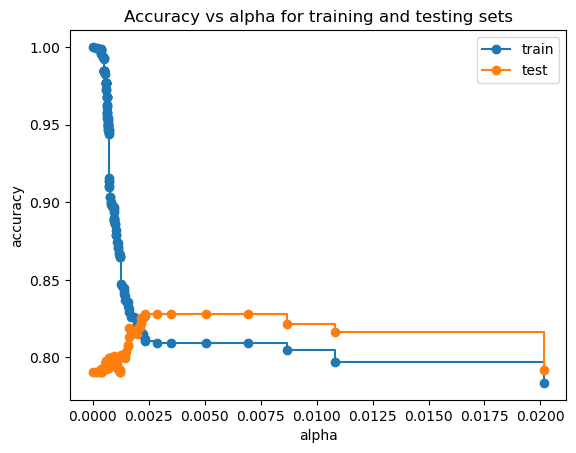

In [12]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


## Optimal ccp_alpha

In [13]:
for i in range(len(ccp_alphas)):
  if(ccp_alphas[i] < 0.0025 or ccp_alphas[i] > 0.008):
    continue
  print("index", i, "||", ccp_alphas[i], "||", test_scores[i])

clf = clfs[126]

index 128 || 0.0028892253920769495 || 0.8278985507246377
index 129 || 0.0035097890464014236 || 0.8278985507246377
index 130 || 0.005069377849595158 || 0.8278985507246377
index 131 || 0.006950100053880831 || 0.8278985507246377


## Top Features

In [14]:
most_features_frame = pd.DataFrame(
    data=clf.feature_importances_,
    columns=["importance"],
    index=X_train.columns,
).sort_values(by=["importance"], ascending=False)

# print(most_features_frame)
top_5_feature = most_features_frame.index[:6]
top_5_feature_list = [i for i in top_5_feature]
print(top_5_feature_list)

['typescript', 'angular', 'node.js', 'software_engineering', 'sql', 'software_development']


## Visualization

In [15]:
# from graphviz import Source
# from sklearn import tree

# Source( tree.export_graphviz(clf, out_file=None, feature_names=df_x.columns))
# #graph.format = 'png'
# #png_bytes = graph.pipe(format='png')
# #with open('dtree_pipe.png','wb') as f:
# #    f.write(png_bytes)

In [16]:
#df_data.head()

#df_y.head()

## Predict

In [30]:
df_prediction_input = pd.DataFrame(0, index=np.arange(1),columns=X_train.columns)

df_prediction_input.loc[:, 'node.js'] = 1

#df_prediction_input.loc[:, 'angular'] = 1

#df_prediction_input.loc[:, 'zoning'] = 1

#print(df_prediction_input.columns)

predicted = clf.predict_proba(df_prediction_input)

pd.DataFrame(predicted, columns=['not_software_engineer', 'is_software_engineer'])

,not_software_engineer,is_software_engineer
0,0.403226,0.596774


In [27]:
df_prediction_input

,#_wearemarkerstudy_employee_network,#edw,._net_core_c#,.asp_web_application_programming,.ksh,.net,.net_(c#),.net_(preferably_c#)_programming,.net_/_c#,.net_c#,...,zfs,zoning,zookeeper,zoom,zoom_admin,zoom_rooms,zowe,zscaler,ztna/sase,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Save model

In [18]:
from joblib import dump

filename = 'software_engineer_clf.joblib'
dump(clf, filename)

# !cp "$filename" "/content/drive/My Drive/data_workspace/$filename"

['software_engineer_clf.joblib']

## Load from file

In [19]:
from joblib import load

filename = 'software_engineer_clf.joblib'

clf_load = load(filename)

df_prediction_input = pd.DataFrame(0, index=np.arange(1),columns=X_train.columns)

#df_prediction_input.loc[:, 'node.js'] = 1

predicted = clf_load.predict_proba(df_prediction_input)

pd.DataFrame(predicted, columns=['not_software_engineer', 'is_software_engineer'])

,not_software_engineer,is_software_engineer
0,0.8295,0.1705


In [20]:
df_prediction_input

,#_wearemarkerstudy_employee_network,#edw,._net_core_c#,.asp_web_application_programming,.ksh,.net,.net_(c#),.net_(preferably_c#)_programming,.net_/_c#,.net_c#,...,zfs,zoning,zookeeper,zoom,zoom_admin,zoom_rooms,zowe,zscaler,ztna/sase,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train.to_csv('columns.csv')